# <p style="text-align: center;"> <b> Exploring and Pre-processing Data </b></p>
---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #867FEE; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>

- [1. Basic infomation](#1)
- [2. Data distribution](#2)
    - [2.1 Numerical columns](#2.1)
    - [2.2 Categorical columns](#2.2)
- [3. Abnormal values and outliers](#3)
- [4. Correlation between variables](#4)
- [5. Save the cleaned dataset](#5)


<a class="anchor" id="import"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Import Libraries  </div>

In [30]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a class="anchor" id="load_data"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Load dataset</div>

In [2]:
df = pd.read_csv('data/dataset.csv',index_col=0)
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36005,5JdLUE9D743ob2RtgmVpVx,Jain,Zanaka,Makeba,60,249533,False,0.824,0.656,2,-9.432,1,0.0704,0.38800,0.506000,0.253,0.418,116.068,4,french
37664,40KFVEXgisK6Z851aESYqR,MC BN;Mc Kitinho;DJ Kley;Jeff,Quando Ela Tira a Calcinha,Quando Ela Tira a Calcinha,4,175384,True,0.779,0.630,2,-2.979,1,0.0617,0.00676,0.000313,0.159,0.498,130.211,4,funk
52719,5VkWRjrMva9rl0iYwnSSw5,George Jones,The Grand Tour,She Told Me So,11,173173,False,0.631,0.180,2,-15.657,1,0.0288,0.96600,0.000030,0.219,0.308,95.438,4,honky-tonk
3068,1v3rsZZAH13mnXEEz3AEL5,Dominic Fike;Zendaya,Autumn Vibe,"Elliot’s Song - From ""Euphoria"" An HBO Origina...",1,152144,False,0.341,0.266,4,-17.251,1,0.1460,0.83100,0.000000,0.113,0.388,184.140,4,alternative
61690,6Osk5QrQppvJwBngiyRqS6,Flower,THIS IS Flower THIS IS BEST,恋人がサンタクロース(version2016),20,291573,False,0.701,0.919,10,-3.511,1,0.0410,0.22400,0.000012,0.291,0.644,131.983,4,j-idol



<a class="anchor" id="1"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Basic information</div>

## <span style='color:#2B9C15 '> 📕  How many rows and columns? </span>

In [3]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} columns and {nrows} rows')

Dataset has 114000 columns and 20 rows



## <span style='color:#2B9C15 '> 📕 What is the meaning of each row? </span>

Each row in the Spotify track dataset represents the information of a single song from Spotify. The dataset includes identification information such as `track_id`, `track_name`, `artists`... and various audio features like `danceability`, `energy`, `loudness`, `speechiness`...

## <span style='color:#2B9C15 '> 📕 Are there duplicated rows? </span>


We will check for the number of duplicated rows, and if any are found, we will drop them

In [4]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    df = df.drop_duplicates()
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left')

There are 450 rows that are duplicated so we need to drop those 450 rows
After drop duplicated rows, there are 113550 rows left


## <span style='color:#2B9C15 '> 📕 What is the meaning of each colum? </span>

| Column          | Description                                                                                                                    |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------|
| `track_id`      | The Spotify ID for the track                                                                                                   |
| `artists`       | The names of the artists who performed the track, separated by ';' if there is more than one artist                               |
| `album_name`    | The name of the album in which the track appears                                                                              |
| `track_name`    | The name of the track                                                                                                          |
| `popularity`    | The popularity of the track on a scale from 0 to 100, based on the total number of plays and recency                             |
| `duration_ms`   | The length of the track in milliseconds                                                                                        |
| `explicit`      | Indicates whether the track has explicit lyrics (true = yes, false = no or unknown)                                           |
| `danceability`  | Describes how suitable a track is for dancing, with 0.0 being least danceable and 1.0 being most danceable                     |
| `energy`        | A measure from 0.0 to 1.0 representing the intensity and activity of the track                                                |
| `key`           | The key the track is in, mapped to pitches using standard Pitch Class notation                                                |
| `loudness`      | The overall loudness of the track in decibels (dB)                                                                            |
| `mode`          | Indicates the modality (major = 1, minor = 0) of a track's melodic content                                                    |
| `speechiness`   | Detects the presence of spoken words in a track, with values above 0.66 likely indicating spoken words                          |
| `acousticness`  | A confidence measure from 0.0 to 1.0 of whether the track is acoustic                                                         |
| `instrumentalness` | Predicts whether a track contains no vocals, with values closer to 1.0 indicating instrumental tracks                         |
| `liveness`      | Detects the presence of an audience in the recording, with higher values indicating a greater likelihood of a live performance |
| `valence`       | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track                                              |
| `tempo`         | The overall estimated tempo of a track in beats per minute (BPM)                                                               |
| `time_signature`| An estimated time signature, indicating how many beats are in each bar                                                          |
| `track_genre`   | The genre in which the track belongs                                                                                          |



## <span style='color:#2B9C15 '> 📕 What is the current data type of each column? Are there any columns having inappropriate data types? </span>
First, we will use dtypes to explore the data types of columns in the dataset

In [5]:
df.dtypes.to_frame('Data Type')

,Data Type
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [6]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

obj_cols = df.select_dtypes(include='object').columns
df[obj_cols].apply(open_object_dtype, axis=0).to_frame('Data Type')


,Data Type
track_id,{<class 'str'>}
artists,"{<class 'str'>, <class 'float'>}"
album_name,"{<class 'str'>, <class 'float'>}"
track_name,"{<class 'str'>, <class 'float'>}"
track_genre,{<class 'str'>}


We can observe that there are three columns with inappropriate data types:

- `artists`, `album_name`, `track_name`: they contain a mix of str and float types.

This inconsistency might be due to the presence of `NaN` values in these columns, as `NaN` is of type `float`

## <span style='color:#2B9C15 '> 📕 Missing values in each row </span>

We check for missing values in each row. Since the dataset has 20 columns, if any row has more than 10 missing values, we will drop that row.

In [7]:
# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113549 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


So, all rows have no missing values except for one row with 3 missing values. We will handle this particular row in the subsequent section.


<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Data Distribution </div>



<a class = "anchor" id = "2.1"></a>
## <span style='color:#2B9C15 '> 2.1 Numerical columns </span>

We need to extract all numerical columns and store them in the variable `numerical_cols`

In [8]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(113550, 14)

There are 14 numerical columns, let's see 5 sample rows of them

In [9]:
numerical_cols.sample(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92675,24,151773,0.447,0.965,4,-6.894,0,0.0611,0.00201,0.491000,0.0967,0.916,113.004,4
18968,20,271083,0.537,0.853,9,-12.132,1,0.9480,0.93100,0.000000,0.5700,0.203,66.743,3
65359,75,172936,0.390,0.767,11,-3.918,0,0.2930,0.03540,0.000004,0.0601,0.285,200.263,4
74701,39,329120,0.364,0.841,1,-8.882,0,0.4050,0.44900,0.000000,0.9540,0.349,102.477,4
36357,57,176000,0.812,0.432,11,-9.119,0,0.0384,0.78200,0.493000,0.1340,0.629,89.000,4


#### 👉 What is the percentage of missing values?

To start our analysis, we first examined the numerical columns using the `info()` method.

In [10]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113550 non-null  int64  
 1   duration_ms       113550 non-null  int64  
 2   danceability      113550 non-null  float64
 3   energy            113550 non-null  float64
 4   key               113550 non-null  int64  
 5   loudness          113550 non-null  float64
 6   mode              113550 non-null  int64  
 7   speechiness       113550 non-null  float64
 8   acousticness      113550 non-null  float64
 9   instrumentalness  113550 non-null  float64
 10  liveness          113550 non-null  float64
 11  valence           113550 non-null  float64
 12  tempo             113550 non-null  float64
 13  time_signature    113550 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


Subsequently, we calculated the minimum and maximum values for each numerical column, along with the corresponding percentage of missing values.

But in the `key` column (song key), there will be a value of -1 if the key of the song cannot be determined. Therefore, we will calculate the number of missing values in the column by counting the number of -1 values in the 'key' column

In [11]:
dist_numerical_cols = numerical_cols.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = numerical_cols.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (numerical_cols.isnull().mean() * 100).round(2)
# The number of -1 values in the 'key' column
dist_numerical_cols.loc['key', 'Missing Values'] = (df['key'] == -1).sum()
dist_numerical_cols

,min,max,Missing Values,Missing Percentage
popularity,0.000,100.000,0,0.0
duration_ms,0.000,5237295.000,0,0.0
danceability,0.000,0.985,0,0.0
energy,0.000,1.000,0,0.0
key,0.000,11.000,0,0.0
loudness,-49.531,4.532,0,0.0
mode,0.000,1.000,0,0.0
speechiness,0.000,0.965,0,0.0
acousticness,0.000,0.996,0,0.0
instrumentalness,0.000,1.000,0,0.0


The output shows that all numeric columns have a missing value percentage of 0, indicating that **there are no missing values** in these columns.

To gain further insights into the data, we used the `describe()` method to generate a comprehensive statistical summary of the numerical columns.

In [12]:
numerical_cols.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**👉 Distribution of numerical columns**

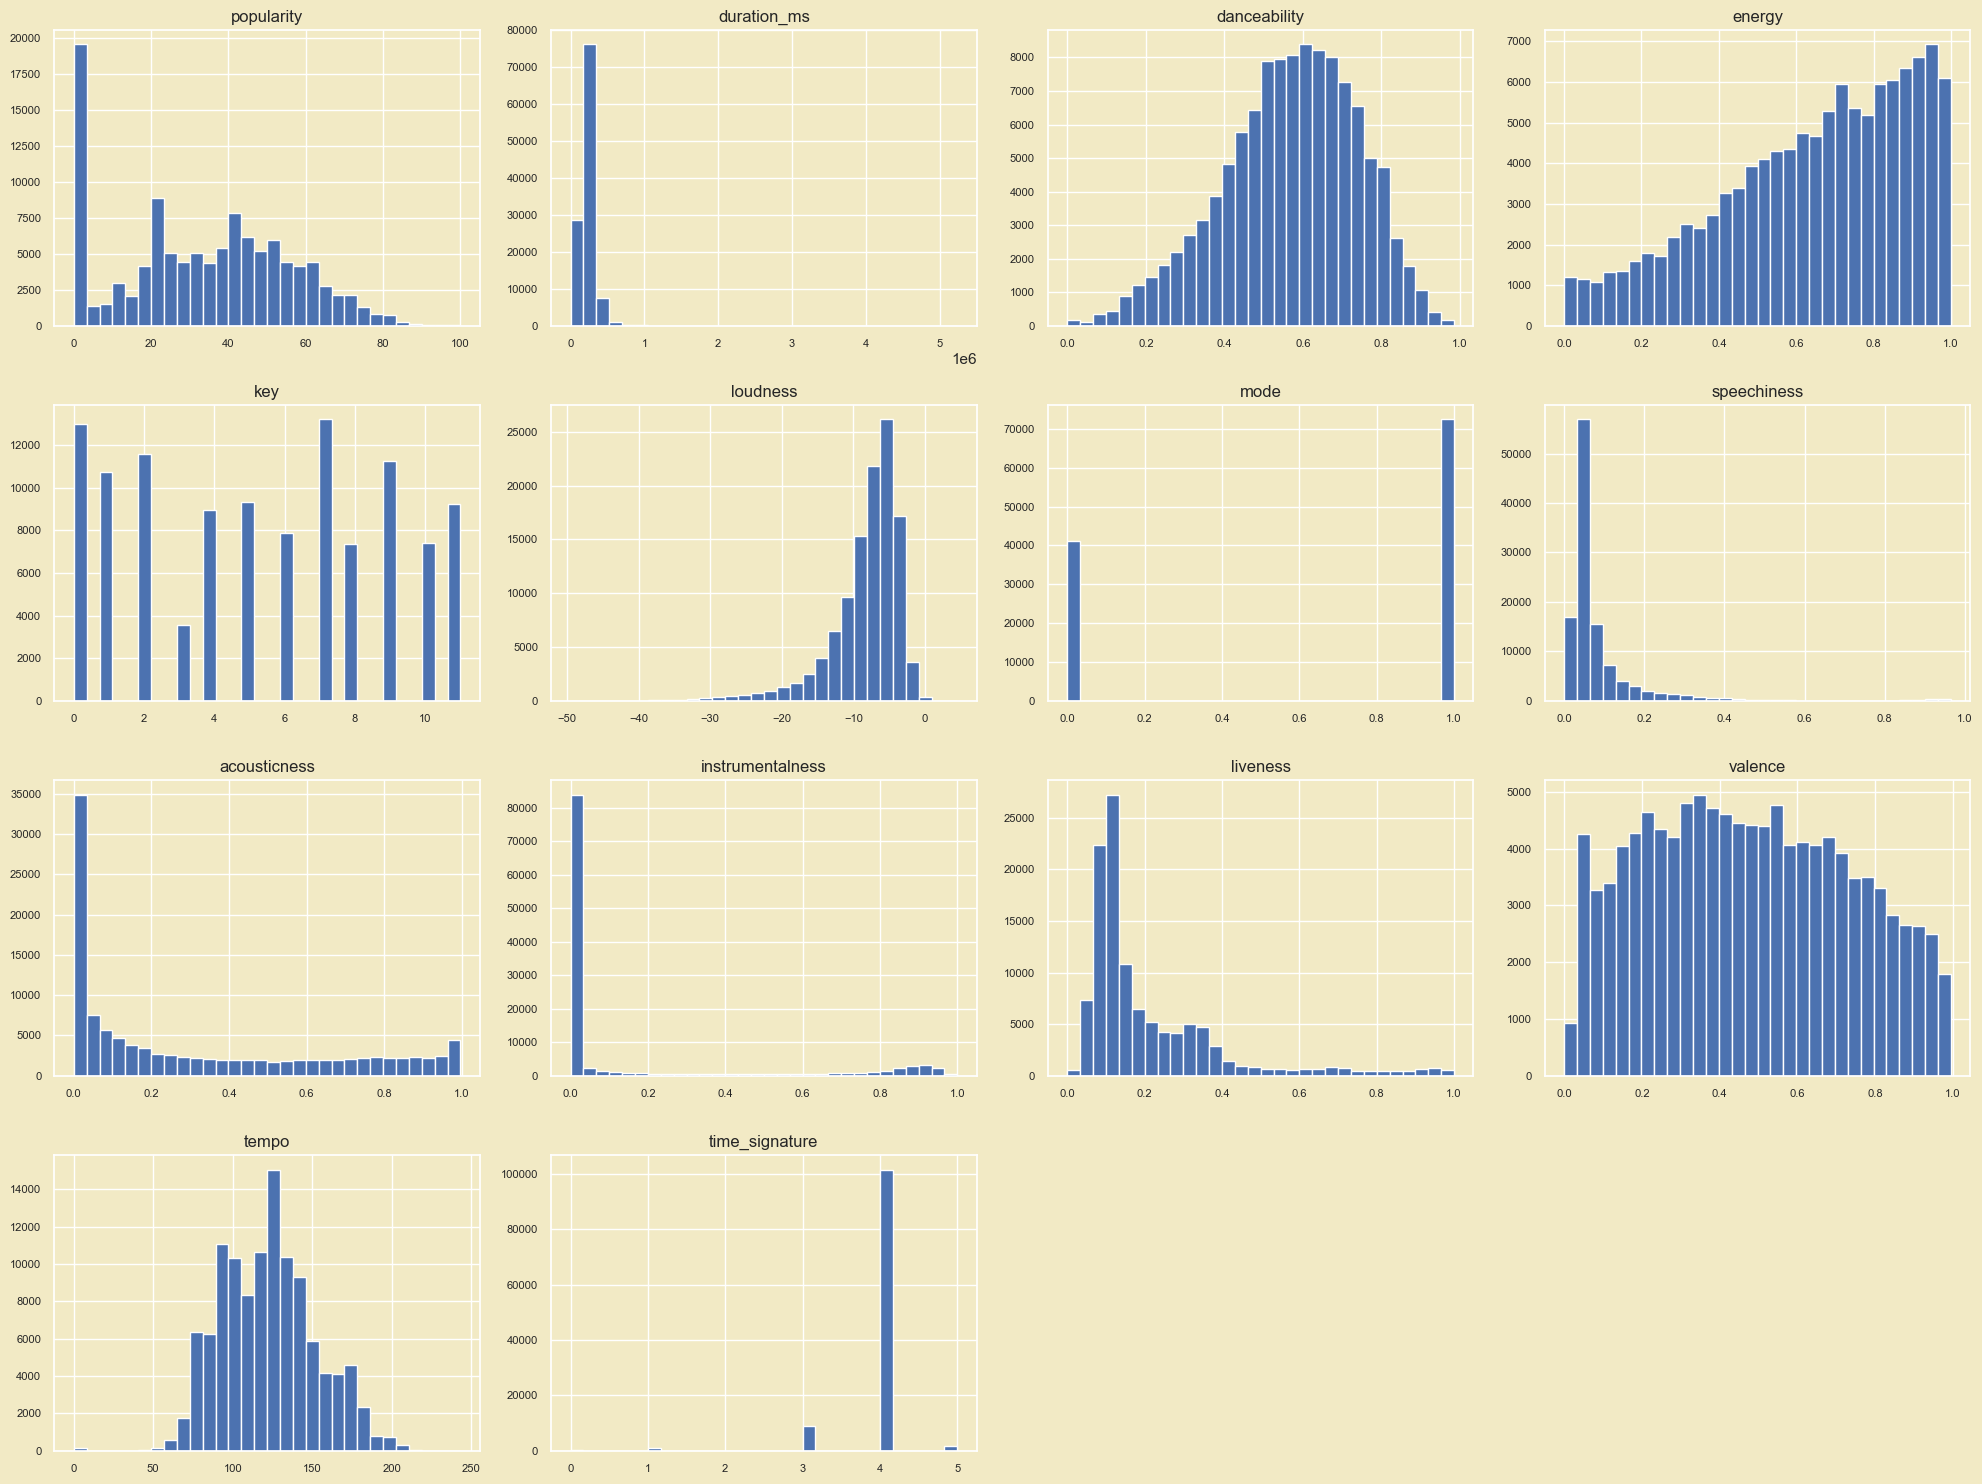

In [13]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

**📙 Comment**

- The columns `danceability`, `tempo`, `valence` have distributions close to normal.
- The column `loudness` has a left-skewed distribution, mainly songs with noise levels ranging from -15 to -5 dB.
- The columns `speechiness`, `acousticness`, `instrumentalness`, and `liveness` have right-skewed distributions, mostly songs with low values.
- There are many songs with a `popularity` value of 0; the rest are close to a normal distribution.
- The `duration_ms` column has a right-skewed distribution, with most songs having a duration of less than 500,000 ms (8 minutes) and the longest around 5 million ms (83 minutes).
- The `energy` column has an increasing distribution from 0 to 1, mainly songs with values from 0.4 to 0.9.
- The `key` column has distinct values from 0 to 11, distributed fairly evenly.
- The `mode` column has 2 values, 0 and 1, with the value 1 dominating, almost double the value 0.
- The `time_signature` column has many songs with a value of 5 (majority).
- The columns `danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence` all have min = 0 and max = 1.



<a class = "anchor" id = "2.2"></a>
## <span style='color:#2B9C15 '> 2.2 Categorical columns </span>

We need to extract all categorical columns and store them in the variable `categorical_cols`

In [14]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.shape

(113550, 6)

There are 6 categorical columns, let's see 5 sample rows of them

In [15]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
13441,7m3YpisHhBG2j98LXFngHP,Mr. Fingers,Cerebral Hemispheres,Cerebral Hemispheres,False,chicago-house
21780,0Ne5BxmfLXFVHCLnImpsrr,Nervz;Navaz,Street College,Chappa Fi True,False,dancehall
104833,3HmjYeaiWUQfd8SmOpnSD3,La Oreja de Van Gogh,Cometas por el Cielo en Directo Desde América,Muñeca de Trapo - Directo Mexico,False,spanish
43156,35ZmCVnfYRdK1iLGCxNhMa,Static-X,Shadow Zone,The Only,False,groove
94783,4jcIsQPXUXp866w3lT5AzO,brakence,caffeine,caffeine,True,sad


#### 👉 What is the percentage of missing values?

To start our analysis, we first examined the categorical columns using the `info()` method.

In [16]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


We calculated the number of missing values and percentage of missing values for each categorical column.

In [17]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
track_id,0,0.000000
artists,1,0.000881
album_name,1,0.000881
track_name,1,0.000881
explicit,0,0.000000
track_genre,0,0.000000


We will examine the rows with missing values to consider how to handle them

In [18]:
categorical_cols[categorical_cols.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,False,k-pop


So, all three columns with missing values are in this particular row. We will proceed to drop that row

In [19]:
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
df.drop(index_to_drop, inplace=True)

print(f'Rows with missing values dropped. Updated DataFrame shape: {df.shape}')

Rows with missing values dropped. Updated DataFrame shape: (113549, 20)


**Concise statistics of categorical columns**

- `count`: the number of values in each column
- `unique`: the number of unique values
- `top`: the most frequently occurring value
- `freq`: the frequency

In [20]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113549,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103831,1000


**📙 Observation:**
- Some tracks have multiple entries, as the count is higher than the unique 
- "The Beatles" is the top artist with a relatively high frequency.
- The top album is "Alternative Christmas 2022" with a frequency of 195.
- "Run Rudolph Run" is the most frequently occurring track name.
- The majority of tracks are not explicit (lyrics).
- "Acoustic" is the most frequent track genre.

### 👉 Visualize unique values

- Each song has a unique `track_id`, so visualizing it might not provide meaningful insights.
- Since `explicit` has only 2 unique values, we can visually analyze and explore the distribution of these values.
- For columns like `artists`, `album_name`, `track_name`, and `track_genre` with a considerable number of unique values, it's impractical to check them all. Therefore, we will visualize the top 10 most frequently occurring values in each column.

**Distribution of explicit**

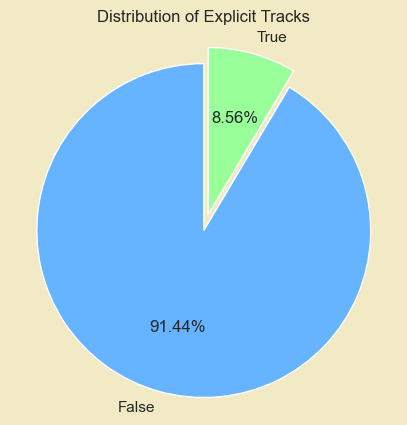

In [21]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

# Explode the slice with explicit tracks for emphasis
explode = [0, 0.1]  # Only "yes" (true) will be slightly exploded
colors = ['#66b3ff','#99ff99']

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

- As shown in the pie chart, we can observe that the majority of tracks do not contain explicit lyrics (over 90%). 
- This trend may be attributed to considerations such as the avoidance of explicit content in lyrics, as well as cultural, societal, and regulatory factors associated with content release.
-  Artists and music producers may opt for cleaner content to appeal to a broader audience and comply with cultural norms and distribution regulations.

**👉 Top of artists, album_name, track_name, track_genre**

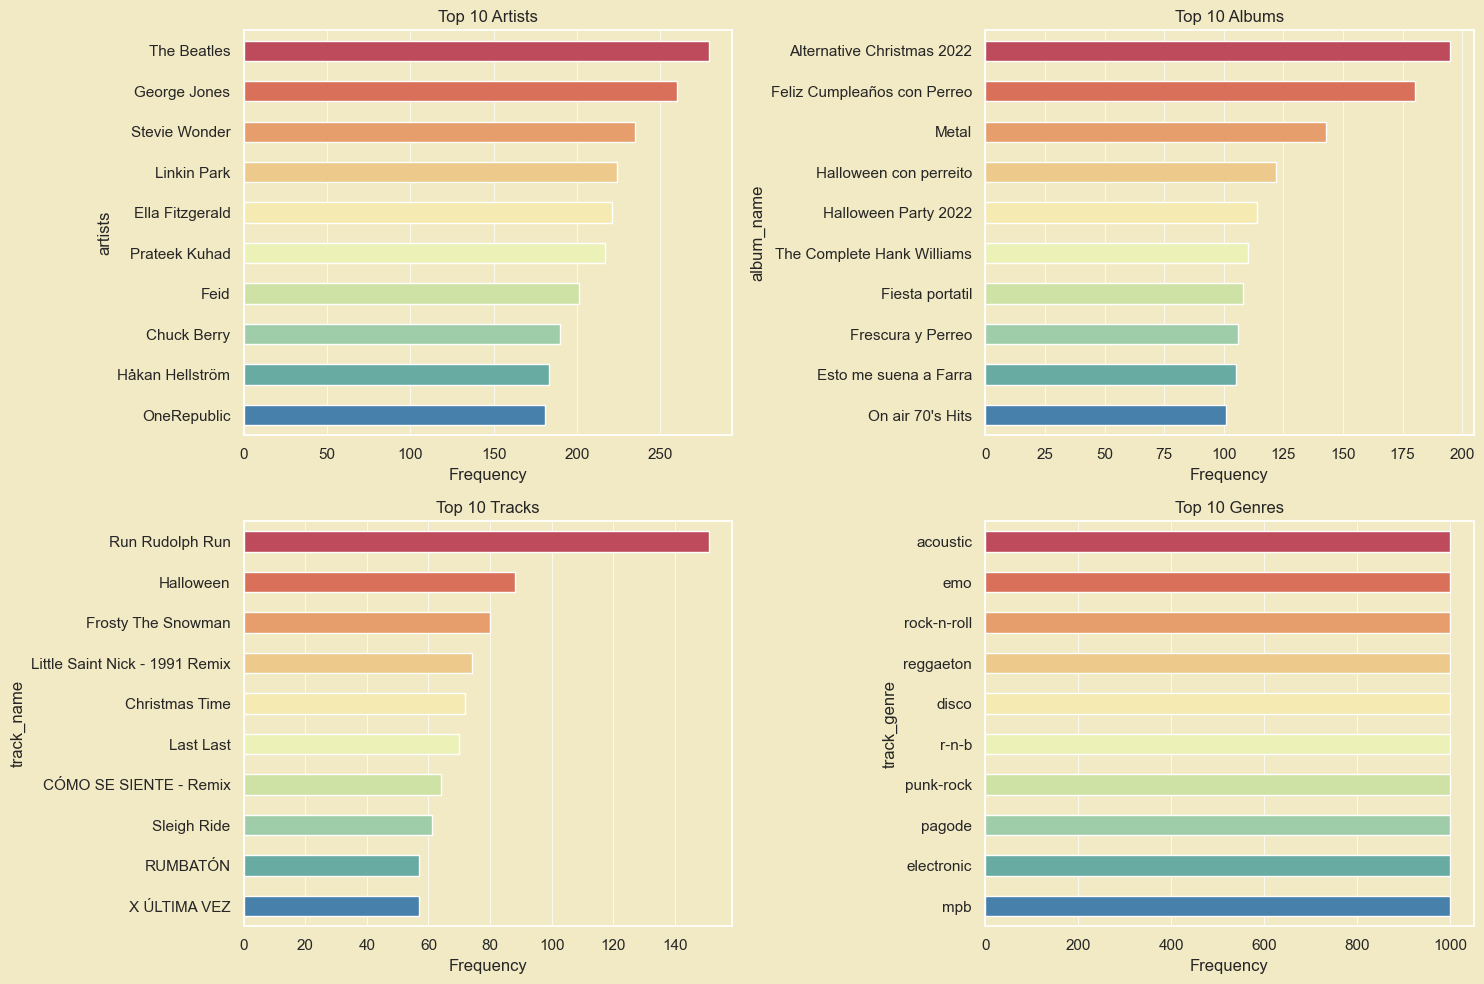

In [22]:
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="Spectral", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="Spectral", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="Spectral", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="Spectral", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()


**📙 Comment**

- The top 10 artists are all renowned, with "The Beatles" being the most popular.
- The dataset was collected in October 2022, so the top album and top track name are Halloween-themed and Christmas-themed, respectively.
- The top 10 track genres are all popular genres, and they all appear with the same frequency (frequency = 1000).



<a class = "anchor" id = "3"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Abnormal values and outliers </div>


We can observe that the distribution as well as the range of values in the numerical columns are **no abnormal values** so we will check outliers for some columns. We will use boxplot to visualize outliers

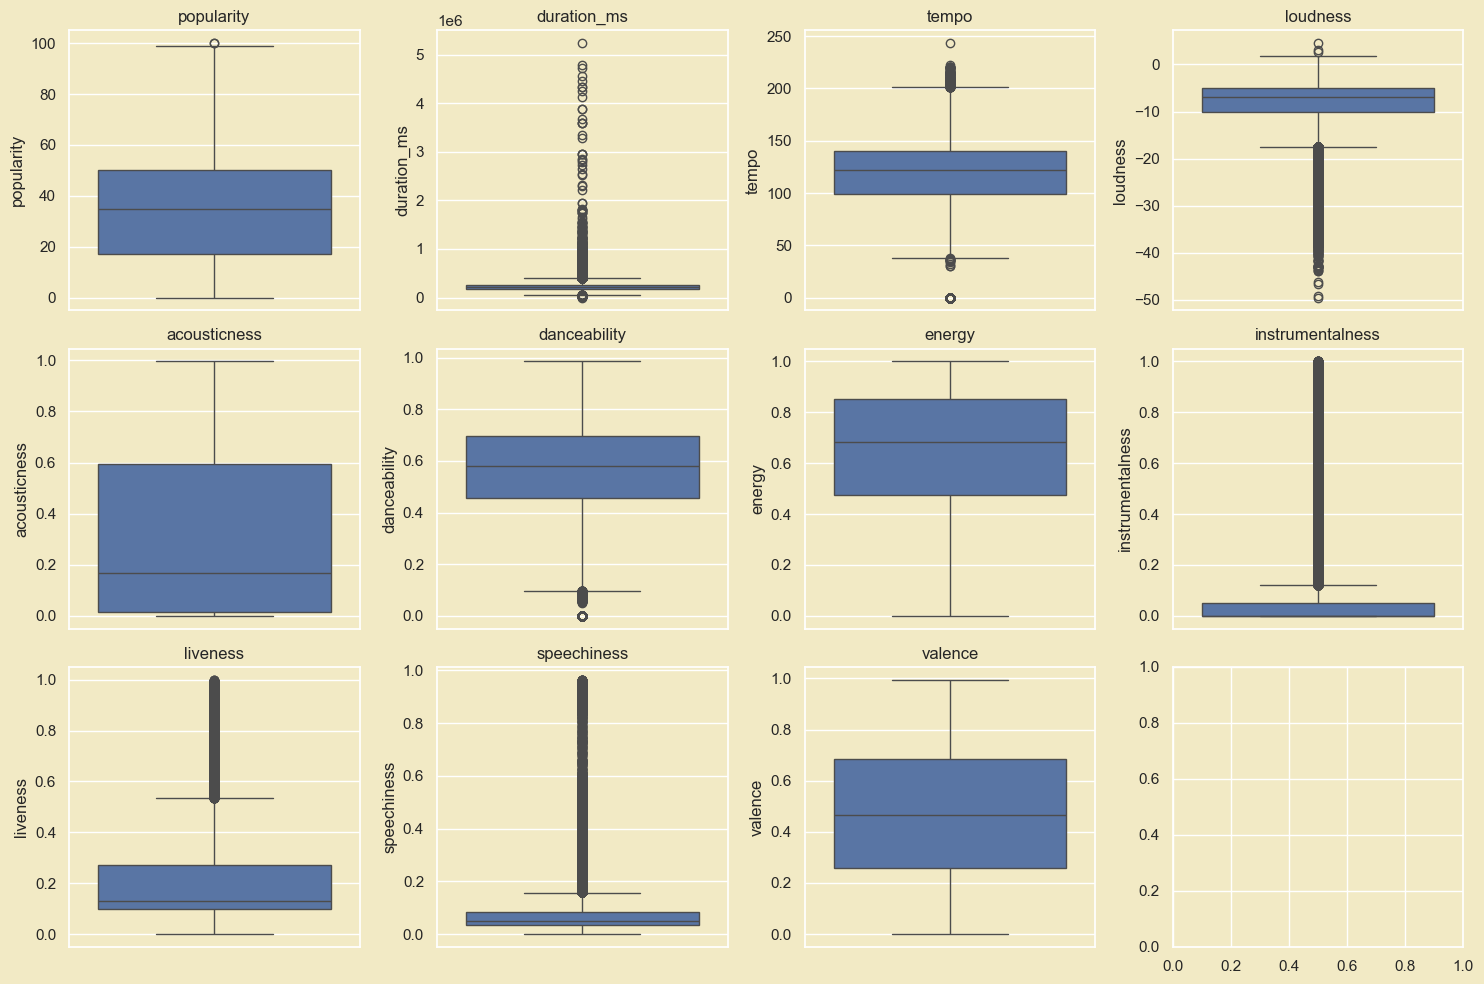

In [23]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

**📙 Comment**

- `popularity`, `acousticness`, `energy`, `valence` have no outliers. (The `popularity` column has 1 outlier, but it is not significant.)
- The remaining columns exhibit a substantial number of outliers, which is understandable as they are all continuous variables. These variables have a wide range of values, do not follow a normal distribution, and are influenced by various factors of a song. Therefore, it is justifiable not to remove these outliers, as they contribute to the diversity and complexity of the dataset, reflecting the diverse nature of musical attributes.


<a class = "anchor" id = "4"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">4. Correlation between variables </div>


We will use the `corr()` method to calculate the correlation between numerical columns and visualize it using a heatmap

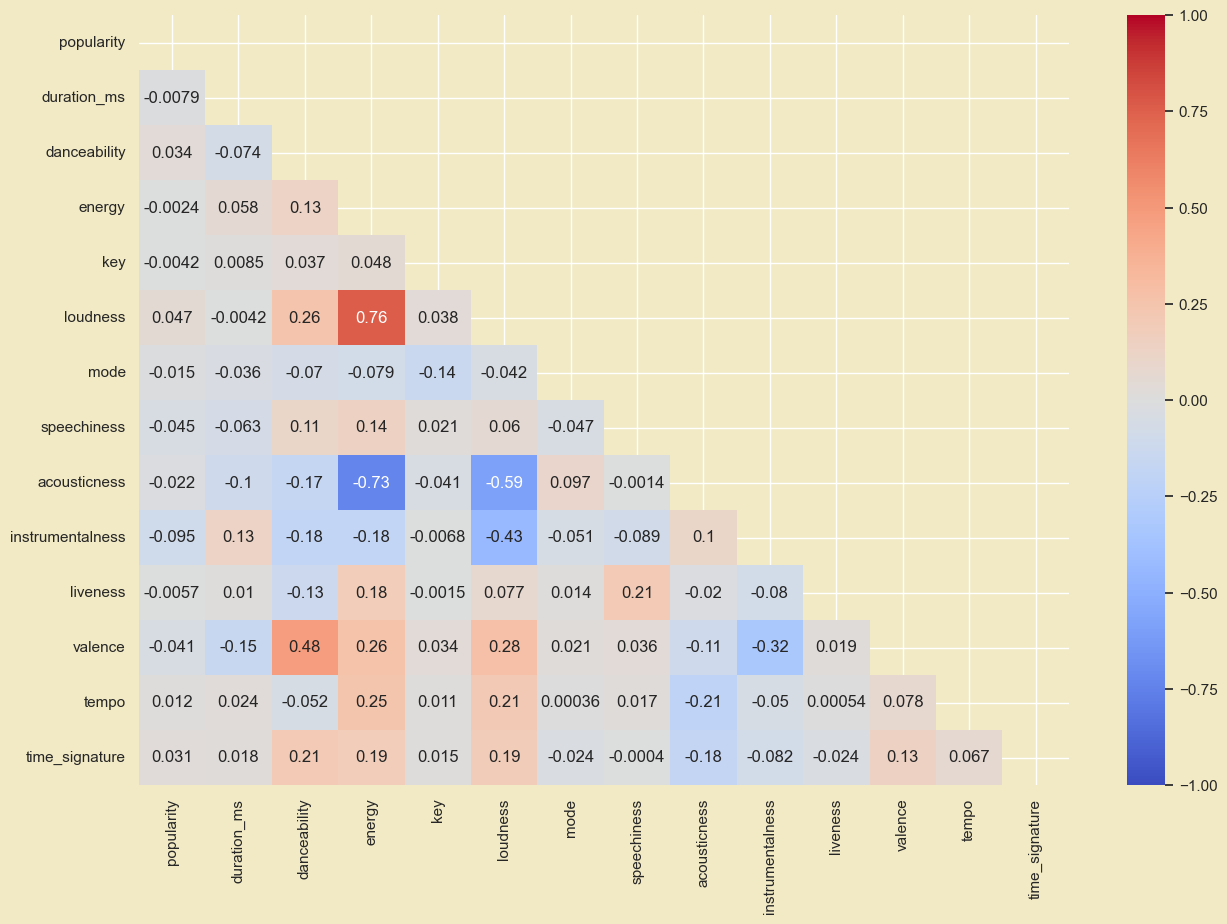

In [29]:
# heatmap for correlation
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

**📙 Comment**

- The majority of columns exhibit very low correlation with each other, with magnitudes below 0.1.
- The columns with the highest correlation are `energy` and `loudness` with a correlation of 0.76, `loudness` and `acousticness` with a correlation of -0.59, and `energy` and `acousticness` with a correlation of -0.73. This is understandable as the energy of a song is inversely proportional to its acousticness, and the loudness of a song is directly proportional to its energy.
- `popularity` has a low correlation with all other variables, which is understandable as popularity is a subjective measure influenced by factors such as the artist's popularity, release date, and genre.
- `instrumentalness` and `loudness` have a negative correlation of -0.43, which is understandable as instrumental songs tend to be quieter than songs with vocals.
- `danceability` and `valence` have a correlation of 0.43, which is understandable as songs with high valence (positiveness) are more likely to be danceable.


<a class = "anchor" id = "5"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">5. Save the cleaned dataset </div>


In [25]:
df.to_csv('data/cleaned_dataset.csv', index=False)

<div style="text-align: left; background-color:#867FEE; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">END</div>